In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
np.set_printoptions(precision=4)
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

def array_to_latex_matrix(arej):
    vrstic = len(arej)
    stolpcev = len(arej[0])
    zacetek =r"""\left[ \begin{{array}}{{{cji}}}
    """.format(cji="c"*stolpcev)
    konec = r"""\end{array} \right] """
    
    vsebina= ""
    for i in range(vrstic):
        for j in range(stolpcev):
            vsebina = vsebina + "{:.3}".format(arej[i][j])
            if not j==stolpcev-1:
                vsebina += r"&"
        if not i == vrstic-1:
            vsebina = vsebina+r"""\\\

"""
    return zacetek + vsebina+ konec

/home/peter/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


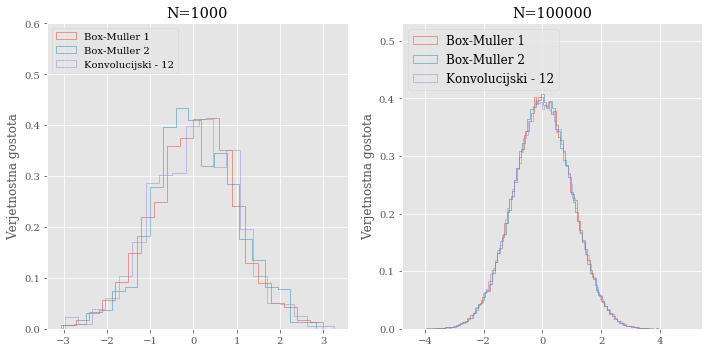

In [2]:
def bm(N, seed=None):
    """Normalno porazdeljenih N števil po Box-Mullerju.
    Uporabi samo eno vejo (y1).
    (Manj trigonometrije, več generacije.).
    """
    if seed is not None:
        np.random.seed(seed)
    x1 = np.random.uniform(size=N)
    x2 = np.random.uniform(size=N)
    y1 = np.sqrt(-2*np.log(x1))*np.cos(2*np.pi * x2)
    return y1
   
def bm2(N, seed=None):
    """Normalno porazdeljenih N števil po Box-Mullerju.
    Uporabi obe veji.
    (Več trigonometrije, manj generacije.)
    """
    if seed is not None:
        np.random.seed(seed)
    N = int(N)
    x1 = np.random.uniform(size=N//2+1)
    x2 = np.random.uniform(size=N//2+1)
    y1 = np.sqrt(-2*np.log(x1))*np.cos(2*np.pi * x2)
    y2 = np.sqrt(-2*np.log(x1))*np.sin(2*np.pi * x2)
    rezultat = np.concatenate((y1,y2))
    return rezultat[0:N]

def konv(N, m=12, seed=None):
    """Normalno porazdeljenih N števil s konvolucijo.
"""
    if seed is not None:
        np.random.seed(seed)
    rezult = np.zeros(N, dtype=np.float_)
    for i in range(N):
        rezult[i] = np.sum(np.random.uniform(size=m))-m/2
    return rezult

def konv2(N, m=24, seed=None):
    """Normalno porazdeljenih N števil s konvolucijo.
"""
    if seed is not None:
        np.random.seed(seed)
    rezult = np.zeros(N, dtype=np.float_)
    for i in range(N):
        rezult[i] = np.sum(np.random.uniform(size=m))-m/2
    return rezult
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("N=1000")
plt.ylabel("Verjetnostna gostota")
plt.hist(bm(1000),bins=20, label="Box-Muller 1",normed=True, histtype="step")
plt.hist(bm2(1000), bins=20,label="Box-Muller 2", normed = True, histtype="step")
plt.hist(konv(1000), bins=20,label="Konvolucijski - 12", normed=True, histtype="step")
plt.legend(loc="upper left")
plt.ylim((0,0.6))
plt.subplot(122)
plt.title("N=100000")
plt.ylabel("Verjetnostna gostota")
plt.hist(bm(100000), label="Box-Muller 1",normed=True, histtype="step", bins=100)
plt.hist(bm2(100000), label="Box-Muller 2", normed = True, histtype="step", bins=100)
plt.hist(konv(100000), label="Konvolucijski - 12", normed=True, histtype="step", bins=100)
plt.legend(loc="upper left", fontsize=12)
plt.ylim((0,0.53))
plt.tight_layout(h_pad=1.1)
#plt.savefig("1-1-hist.pdf")
#plt.savefig("1-1-hist.jpg")
#plt.show()

In [3]:
nji = np.array([10, 100, 1000, 1e4, 1e5, 1e6])
rez = np.zeros((4, len(nji),2))
from scipy.stats import kstest
for i, n in enumerate(nji):
    for j,funkcija in enumerate([bm, bm2, konv, konv2]):
        rez[j,i] = kstest(funkcija(int(n)), "norm")
rez
        
        
        

array([[[2.5490e-01, 4.6428e-01],
        [1.1278e-01, 1.4546e-01],
        [2.9456e-02, 3.4585e-01],
        [4.6388e-03, 9.8251e-01],
        [2.4817e-03, 5.6909e-01],
        [1.3388e-03, 5.5496e-02]],

       [[2.7848e-01, 3.5385e-01],
        [1.0953e-01, 1.6855e-01],
        [1.7730e-02, 9.1170e-01],
        [8.7685e-03, 4.2548e-01],
        [2.3212e-03, 6.5411e-01],
        [7.5539e-04, 6.1810e-01]],

       [[2.5293e-01, 4.7444e-01],
        [6.9765e-02, 7.2203e-01],
        [1.4864e-02, 9.7996e-01],
        [8.5210e-03, 4.6213e-01],
        [3.6198e-03, 1.4547e-01],
        [2.4159e-03, 1.7034e-05]],

       [[3.0409e-01, 2.5692e-01],
        [1.2528e-01, 7.9371e-02],
        [9.0557e-02, 1.3817e-07],
        [8.7254e-02, 1.4875e-66],
        [8.4391e-02, 0.0000e+00],
        [8.4607e-02, 0.0000e+00]]])

In [4]:
#plt.matshow(rez[:,:,0])
#plt.colorbar()
#plt.yticks(["bm", "bm2", "konv", "konv2"])
#plt.xticks(nji)
#plt.savefig("1-2-matrikaD.pdf")
#plt.show()

In [5]:
rez.shape

(4, 6, 2)

In [6]:
import time
def cajt(funk, *args):
    """Izmeri čas, ki ga rabi funkcija funk, da nekaj
    napravi. Argumenti args pritičejo funkciji funk."""
    start = time.clock()
    a = funk(*args)
    del(a)
    return time.clock()-start

nji = np.array([10, 100, 1000, 1e4, 2e4,5e4, 1e5, 2e5,5e5, 1e6,2e6,5e6, 1e7,2e7,5e7])
rez = np.zeros((4, len(nji)))

for i, n in enumerate(nji):
    for j,funkcija in enumerate([bm, bm2, konv, konv2]):
        rez[j,i] = cajt(funkcija, int(n))
        print(f"Zej abdelujem funkcija {funkcija.__name__}, mirm pa generacija {n:.03g} števil.  ")
cajti = pd.DataFrame(data = rez.T, columns = ["bm", "bm2", "konv", "konv2"])
cajti["N"] = nji
cajti.to_csv("cajti.csv")     

Zej abdelujem funkcija bm, mirm pa generacija 10 števil.  
Zej abdelujem funkcija bm2, mirm pa generacija 10 števil.  
Zej abdelujem funkcija konv, mirm pa generacija 10 števil.  
Zej abdelujem funkcija konv2, mirm pa generacija 10 števil.  
Zej abdelujem funkcija bm, mirm pa generacija 100 števil.  
Zej abdelujem funkcija bm2, mirm pa generacija 100 števil.  
Zej abdelujem funkcija konv, mirm pa generacija 100 števil.  
Zej abdelujem funkcija konv2, mirm pa generacija 100 števil.  
Zej abdelujem funkcija bm, mirm pa generacija 1e+03 števil.  
Zej abdelujem funkcija bm2, mirm pa generacija 1e+03 števil.  
Zej abdelujem funkcija konv, mirm pa generacija 1e+03 števil.  
Zej abdelujem funkcija konv2, mirm pa generacija 1e+03 števil.  
Zej abdelujem funkcija bm, mirm pa generacija 1e+04 števil.  
Zej abdelujem funkcija bm2, mirm pa generacija 1e+04 števil.  
Zej abdelujem funkcija konv, mirm pa generacija 1e+04 števil.  
Zej abdelujem funkcija konv2, mirm pa generacija 1e+04 števil.  
Zej 

In [7]:
cajti = pd.DataFrame(data = rez.T, columns = ["bm", "bm2", "konv", "konv2"])
cajti["N"] = nji
cajti.to_csv("cajti.csv")     

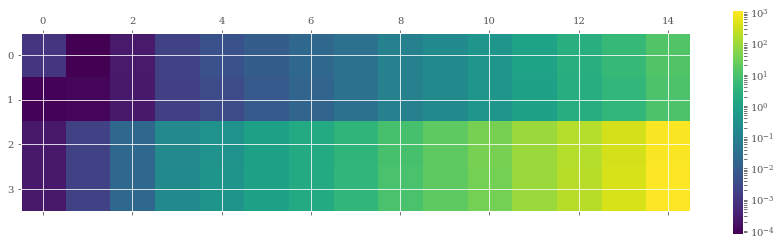

\left[ \begin{array}{ccccccccccccccc}
    0.000973&8.2e-05&0.000277&0.002&0.00508&0.0102&0.0202&0.0408&0.113&0.229&0.475&1.14&2.4&4.88&12.8\\\

9.5e-05&0.000102&0.000257&0.00183&0.00357&0.00892&0.0177&0.0386&0.104&0.216&0.43&1.03&2.25&4.35&11.4\\\

0.000246&0.00199&0.0198&0.195&0.389&0.972&1.96&3.91&9.61&19.4&38.4&95.1&1.85e+02&4.05e+02&1.03e+03\\\

0.000246&0.00201&0.0197&0.197&0.399&0.988&1.95&4.02&9.91&19.4&37.8&95.8&1.89e+02&4.23e+02&1.14e+03\end{array} \right] 


In [8]:
from matplotlib import colors, cm, pyplot as plt

norm = colors.LogNorm(rez.min(), rez.max())
#plt.imshow(image, cmap=cm.gray, norm=norm, origin="lower")

plt.matshow(rez, norm=norm)
plt.colorbar()
plt.savefig("1-3-casovnamatrikalogaritmirana.pdf")
plt.show()

print(array_to_latex_matrix(rez))

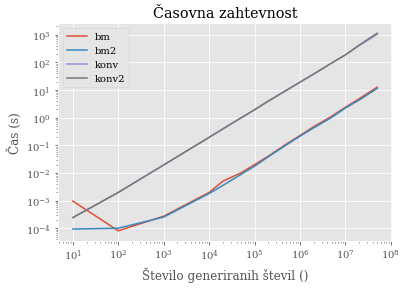

In [9]:
for stolpec in cajti.columns:
    if stolpec is not "N":
        plt.plot(cajti.N, cajti[stolpec], label=f"{stolpec}")
plt.legend()
plt.loglog()
plt.title("Časovna zahtevnost")
plt.ylabel("Čas (s)")
plt.xlabel("Število generiranih števil ()")
plt.savefig("1-4-casovna-zahtevnost.pdf")
plt.show()


In [10]:
hi2(bm)

NameError: name 'hi2' is not defined

/home/peter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys


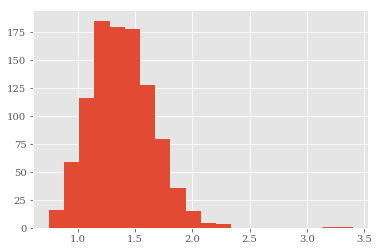

1.383571423721695

In [24]:
nji = np.array([10, 100, 1000, 1e4, 2e4,5e4, 1e5, 2e5,5e5, 1e6,2e6,5e6, 1e7])
modelske_funkcije = [bm, bm2, konv, konv2]
def hi2(funkcija, N=100, binsov=15):
    #from scipy.stats import chisquare
    
    arej = funkcija(N)
    bins, edges = np.histogram(arej, bins=binsov, normed=1)
    bins = bins/bins.sum()
    #print(f"Vsota binsov je: {bins.sum():.3}")
    sredine_edgesov = np.zeros(binsov)
    for i in range(len(edges)-1):
        sredine_edgesov[i] = 0.5*(edges[i]+edges[i+1])
    assert len(sredine_edgesov) == len(bins)
    Mk = gausovka(sredine_edgesov)
    return np.sum((bins-Mk)**2/Mk)
    #return chisquare(bins, f_exp=Mk, ddof=binsov, axis=0)[0]
def gausovka(bins, mu=0, sigma=1):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))

arej = [hi2(bm) for i in range(1000)]
plt.hist(arej, bins=20)
plt.savefig("1-3333-nepravilen-hi.pdf")
plt.show()
np.mean(arej)

In [ ]:
np.sum(bins)

In [ ]:
bins, edges = np.histogram(konv(1000), bins=20,  density=1)
bins = bins
plt.bar(edges[:-1], bins,
        np.diff(edges),
        align="edge", alpha = 0.3)
plt.plot(edges[:-1], gausovka(edges[:-1]))


plt.show()
print(np.sum(bins))

In [1]:
with open("/dev/random", 'rb') as f:
    print(int.from_bytes(f.read(4), 'big'))

2128816771


In [ ]:
np.random.normal()

In [ ]:
np.random.uniform(size=4)

In [ ]:
np.histogram?